#                                   *Programming Assignment 1*

---



##Ayush kumar


##MS19038

# Data

To generate the data for regression, we need to create an input matrix X with n points and m+1 dimensions. This can be done by uniformly sampling X. For the linear parameters, we generate an array beta with length m+1. To simulate error, we generate an array e with length n. The output values for our experiment is then given by Y = X * beta + e, which can be sampled from a Gaussian distribution.

In [ ]:
import numpy as np 

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
def make_data(sigma, n, m):
    X = np.random.random((n, m+1))
    X[:, 0] = 1
    beta = np.random.random((m+1, 1)) * 0.9 + 0.1
    e = np.random.normal(scale=sigma, size=(n, 1))
    return X, X @ beta + e, beta

## Cost function

Our cost function is $0.5 \text{MSE}$, which is given by

$$\text{MSE}=\frac{||X\beta-Y||^2}{2n}$$

The gradient of the cost at each point. In this case, we get

$$\triangle_{\beta} 0.5\text{MSE} = X^T(X\beta - Y)/n$$


In [ ]:
def cost_function(X, beta_guess, Y):
    errors = X@beta_guess - Y
    return (errors.T @ errors) / len(errors)

def gradient(X, beta_guess, Y):
    return X.T @ (X@beta_guess - Y) * 2 / len(Y)

# Implementing Linear Regression

The implementation of Linear Regression follows the following steps:

* A random beta_guess array of size equal to the number of features is generated.


* Repeat the following process k times, where k is the maximum number of epochs:
The beta_guess is updated as beta_guess = beta_guess - gradient * alpha, where alpha is the learning rate.

* The cost is evaluated and recorded.
* If |costs[i-1] - costs[i]| < tau, the loop is exited; where tau is the threshold.


* The final result of the algorithm is beta_guess, costs, and the total number of epochs run.

In [ ]:
def linear_regression(X, Y, k, tau, alpha=0.001):    
    beta_guess = np.random.random((X.shape[1], 1))
    costs = np.full(k, 0.)
    n = k
    for i in range(0, k):
        beta_guess -= gradient(X, beta_guess, Y) * alpha
        costs[i] = cost_function(X, beta_guess, Y)
        if i>0 and np.abs(costs[i-1] - costs[i]) < tau:
            n = i
            break
    return beta_guess, costs, n

### Checking

To check if the code works, let us fit a data set with `n=50` and `m=1`, that is, a 2D data.

In [ ]:
X, Y, b = make_data(0.03, 50, 1)
b1, costs, epochs_run = linear_regression(X, Y, 250000, 1e-7)

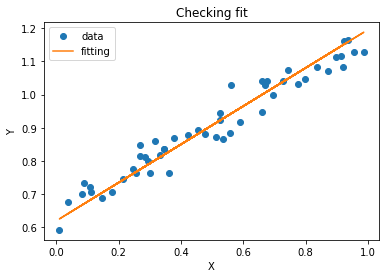

In [ ]:
plt.plot(X[:, 1], Y, "o", label="data")
plt.plot(X[:, 1], X@b1, label="fitting")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Checking fit");

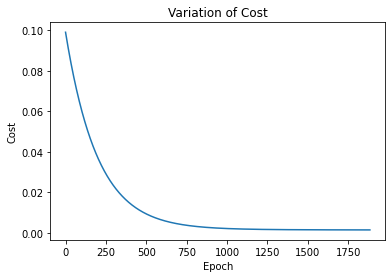

In [ ]:
plt.plot(costs[1:epochs_run])
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Variation of Cost");

To evaluate the goodness of fit, two values from the fitting process are used:



1.   Final Cost: The final cost after a set number of epochs. This provides insight into how well the data can be explained given a time or computational constraint.
2.   Beta norm: The distance between the estimated parameters beta and the actual parameters beta*. This measure provides insight into how well the underlying mechanism of creating the data can be explained. However, if the actual parameters are not known, then only the Final Cost can be used.

Variation with respect to Sigma:

The parameter sigma represents the size of the error in the input data. As the size of the error increases, the fitting process is expected to become more challenging, take longer, and produce less accurate results. To verify this, the two measures of goodness of fit are evaluated for sigma values ranging from 0 to 0.5 with an increment of 0.02, and the results are averaged over 10 runs.

In [ ]:
def scan_sigma(average_over):
    ss = np.arange(0, 0.5, 0.02)
    s_costs = np.zeros(ss.size)
    beta_norm = np.zeros(ss.size)
    n = 50
    for i in range(len(ss)):
        for k in range(average_over):
            X, Y, bs = make_data(ss[i], n, 5)
            b, costs, _ = linear_regression(X, Y, 25000, 1e-8)
            s_costs[i] += costs[-1]
            beta_norm[i] += np.linalg.norm(b-bs) / n
        s_costs[i] /= average_over
        beta_norm[i] /= average_over
    return ss, s_costs, beta_norm

In [ ]:
ss, s_costs, s_beta_norm = scan_sigma(10)

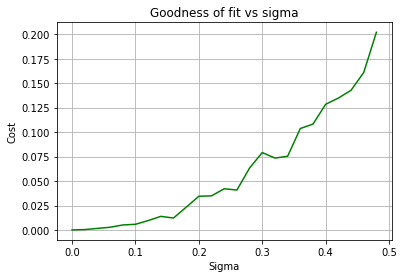

In [ ]:
plt.plot(ss, s_costs, "g")
plt.title("Goodness of fit vs sigma")
plt.xlabel("Sigma")
plt.ylabel("Cost")
plt.grid()

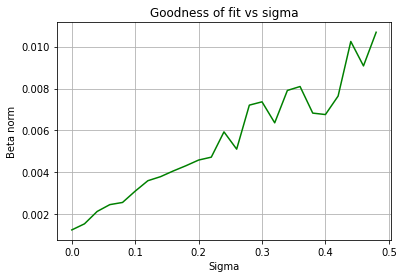

In [ ]:
plt.plot(ss, s_beta_norm, "g")
plt.title("Goodness of fit vs sigma")
plt.xlabel("Sigma")
plt.ylabel("Beta norm")
plt.grid()

### Observations

From the graphs, it is evident that both measures of goodness of fit vary in the expected manner. As the value of sigma increases, the fit becomes worse.

## Variation with respect to n

With more and more data points, the deviation of the variance of the data from zero will approach zero. This means that as the number of data points, n, increases, we can expect to obtain a better fit. To verify this, we scan over n from 1 to 100 and average the results over 10 runs.

In [ ]:
def scan_n(average_over):
    ns = np.arange(1, 200, 10)
    n_costs = np.zeros(ns.size)
    beta_norm = np.zeros(ns.size)
    for i in range(len(ns)):
        for k in range(average_over):
            X, Y, bstar = make_data(0.3, ns[i], 5)
            b, costs, _ = linear_regression(X, Y, 25000, 1e-8)
            n_costs[i] += costs[-1]
            beta_norm[i] += np.linalg.norm(b-bstar) / ns[i]
        n_costs[i] /= average_over
        beta_norm[i] /= average_over
    return ns, n_costs, beta_norm

In [ ]:
ns, n_costs, n_beta_norm = scan_n(10)

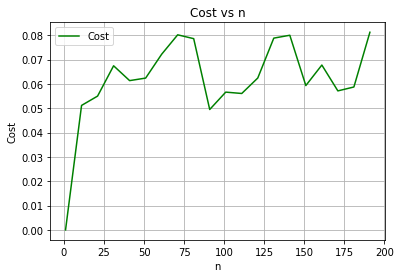

In [ ]:
plt.plot(ns, n_costs, "g", label="Cost")
plt.title("Cost vs n")
plt.xlabel("n")
plt.ylabel("Cost")
plt.legend()
plt.grid()

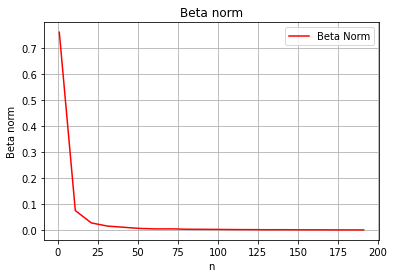

In [ ]:
plt.plot(ns, n_beta_norm, "r", label="Beta Norm")
plt.title("Beta norm")
plt.xlabel("n")
plt.ylabel("Beta norm")
plt.legend()
plt.grid()

### Observations

From the graphs, it is evident that only the beta norm varies as expected with the increase in the number of data points. The fit becomes better as n increases. However, there is not much variance in the cost after a certain value of n.